In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier CSV
file_path = 'turnips2.csv'
data = pd.read_csv(file_path)

# Préparer les données de prix de vente pour le clustering (exclure le prix d'achat)
sell_prices_data = data.drop('Purchase', axis=1)

# Standardiser les données pour que toutes les caractéristiques contribuent équitablement
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sell_prices_data)

# Appliquer le clustering K-Means
# Choix arbitraire de 4 clusters pour l'exemple
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Ajouter les étiquettes de cluster aux données originales pour voir à quel cluster chaque semaine appartient
data['Cluster'] = clusters

# Afficher les premières lignes des données avec les clusters assignés
print(data.head())

c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Purchase  Mon-AM  Mon-PM  Tues-AM  Tues-PM  Wed-AM  Wed-PM  Thurs-AM  \
0        98      60      53      135      101     111     108       113   
1        95      86      82       77       73      70     117       167   
2       110      98      94       88       83      79      75        71   
3       100      86      82       78       73      69     103       172   
4       102      91      88       84      110     152     260       160   

   Thurs-PM  Fri-AM  Fri-PM  Sat-AM  Sat-PM  Cluster  
0       101     122      62      52      44        3  
1       434     170     113      49      63        3  
2        66      61      57      53      47        2  
3       257     182     114      67      46        3  
4       141      73      45      76      55        3  


c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


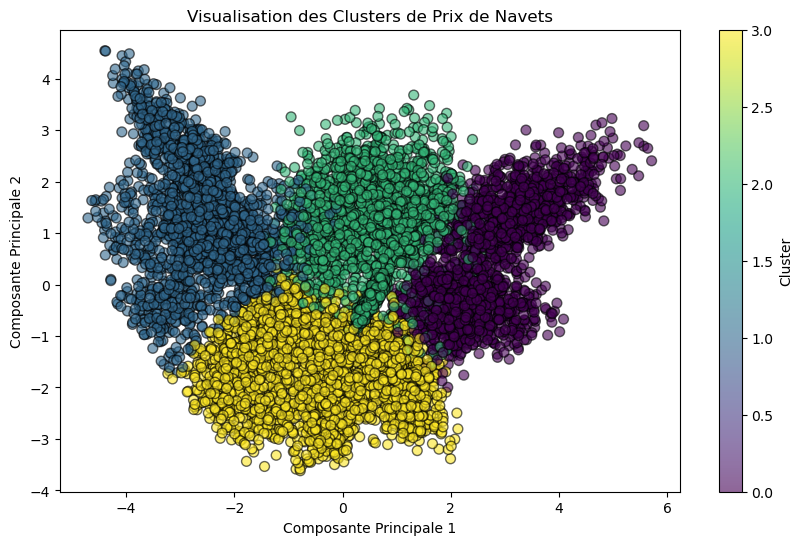

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reprenons le clustering avec 4 clusters comme précédemment discuté
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Appliquer PCA pour réduire à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Tracer les données réduites, colorées par cluster
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Visualisation des Clusters de Prix de Navets')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Cluster')
plt.show()

In [5]:
# Ajouter les étiquettes de cluster aux données originales
data['Cluster'] = clusters

# Analyser les clusters
for cluster in np.unique(clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Statistiques du Cluster {cluster}:")
    print(cluster_data.drop(['Purchase', 'Cluster'], axis=1).describe(), "\n")

Statistiques du Cluster 0:
            Mon-AM       Mon-PM      Tues-AM      Tues-PM       Wed-AM  \
count  1749.000000  1749.000000  1749.000000  1749.000000  1749.000000   
mean     89.168668   107.846198   139.239565   224.037164   220.798742   
std      20.809191    20.429619    29.328006   120.964924   114.839733   
min      38.000000    56.000000    82.000000    93.000000   103.000000   
25%      81.000000    89.000000   115.000000   154.000000   155.000000   
50%      88.000000   108.000000   139.000000   174.000000   175.000000   
75%      96.000000   124.000000   160.000000   209.000000   206.000000   
max     153.000000   154.000000   218.000000   650.000000   633.000000   

            Wed-PM     Thurs-AM     Thurs-PM       Fri-AM       Fri-PM  \
count  1749.000000  1749.000000  1749.000000  1749.000000  1749.000000   
mean    128.066324    78.641509    62.385363    60.644368    57.779874   
std      44.328877    30.209265    15.725118    16.826120    17.004109   
min      3

In [7]:
# Correction: Préparer les données de prix de vente sans référencer 'Cluster'
y_sell_prices = data.drop(['Purchase'], axis=1)

# Division des données en ensembles d'entraînement et de test pour la régression
X_train, X_test, y_train, y_test = train_test_split(X, y_sell_prices, test_size=0.2, random_state=42)

# Réinitialiser les dictionnaires pour stocker les modèles et les performances
linear_models = {}
rf_models = {}
predictions = {}
mse_scores = {}

# Répéter le processus pour la régression linéaire et la forêt aléatoire
for column in y_train.columns:
    # Régression linéaire
    model_lin = LinearRegression()
    model_lin.fit(X_train, y_train[column])
    predictions[column] = model_lin.predict(X_test)
    mse_scores[f'Linear Regression - {column}'] = mean_squared_error(y_test[column], predictions[column])
    linear_models[column] = model_lin
    
    # Forêt aléatoire
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train, y_train[column])
    predictions[column] = model_rf.predict(X_test)
    mse_scores[f'Random Forest Regressor - {column}'] = mean_squared_error(y_test[column], predictions[column])
    rf_models[column] = model_rf

# Préparation pour la classification: déterminer le meilleur jour de vente
y_best_time = y_sell_prices.idxmax(axis=1)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_best_time, test_size=0.2, random_state=42)

# Classification avec forêt aléatoire
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
clf_predictions = clf_model.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, clf_predictions)

# Stocker l'accuracy pour la classification
accuracy_score_clf = accuracy

# Afficher les scores MSE pour la régression et l'accuracy pour la classification
mse_scores, accuracy_score_clf

NameError: name 'X' is not defined